In [55]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch
import os
from numba import cuda 
plt.style.use("science.mplstyle")

from helpers.composite_helpers import *

In [56]:
sim_color = "#990000"
trans_color = "#674ea7"
dat_color = "#1c4587"

dpi = 800

feta_dir = "/global/home/users/rrmastandrea/FETA/"

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

f_0 = 20
f_1 = 12


### Pretty schematics for the paper / talks

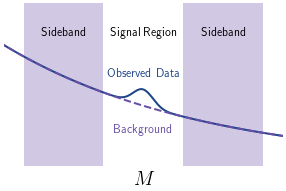

In [57]:
def exp(x, alpha, N):
    return N*np.exp(-alpha*x)

def signal(x, alpha, N, mu, sigma, M):
    return N*np.exp(-alpha*x) + M*np.exp(-0.5*((x-mu)/sigma)**2)

min_range = 0
max_range = 1

n_bkg = 1000
n_sig = 100


w = 2
alpha = 0.3

fig = plt.figure(figsize = (5, 3))


x = np.linspace(0, 1, 1000)


# signal
plt.plot(x, signal(x, 2, n_bkg, .5, .025, n_sig), color = dat_color, linewidth = 2)

# background
plt.plot(x, signal(x, 2, n_bkg, .5, .025, 0), color = trans_color, linewidth = 2, linestyle = "dashed")


# SB1
plt.fill_between([.2, .4], [0, 0], [1000, 1000], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.3, 800, "Sideband", color = "black", ha = "center", fontsize = f_1)
# SB2
plt.fill_between([.6, .8], [0, 0], [1000, 1000], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.7, 800, "Sideband", color = "black", ha = "center", fontsize = f_1)

# SR
plt.text(.5, 800 , "Signal Region", color = "black", ha = "center", fontsize = f_1)

# label2
plt.text(.5, 550 , "Observed Data", color = dat_color, ha = "center", fontsize = f_1)
plt.text(.5, 200 , "Background", color = trans_color, ha = "center", fontsize = f_1)


plt.xlabel("$M$", fontsize = f_0)
plt.xlim(0.15, 0.85)
plt.ylim(0, 1000)
plt.xticks([])
plt.yticks([])
ax = plt.gca()
plt.setp(ax.spines.values(), visible=False)

fig.savefig("paper_plots/schematic_SB.png", dpi = dpi)





plt.show()

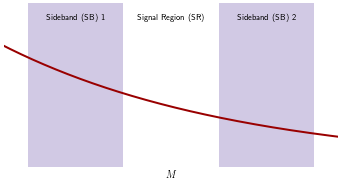

In [58]:
fig = plt.figure(figsize = (6, 3))

# background
#plt.plot(x, exp(x, 2, n_bkg))

# signal
plt.plot(x, signal(x, 2, n_bkg, .5, .025, 0), color = sim_color, linewidth = 2)

# SB1
plt.fill_between([.2, .4], [0, 0], [1000, 1000], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.3, 900, "Sideband (SB) 1", color = "black", ha = "center", fontsize = 8)
# SB2
plt.fill_between([.6, .8], [0, 0], [1000, 1000], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.7, 900, "Sideband (SB) 2", color = "black", ha = "center", fontsize = 8)

# SR
plt.text(.5, 900 , "Signal Region (SR)", color = "black", ha = "center", fontsize = 8)


plt.xlabel("$M$")
plt.xlim(0.15, 0.85)
plt.ylim(0, 1000)
plt.xticks([])
plt.yticks([])
ax = plt.gca()
plt.setp(ax.spines.values(), visible=False)

fig.savefig("paper_plots/schematic_2.png", dpi = dpi)


plt.show()

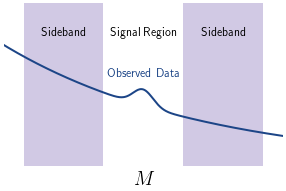

In [59]:
def exp(x, alpha, N):
    return N*np.exp(-alpha*x)

def signal(x, alpha, N, mu, sigma, M):
    return N*np.exp(-alpha*x) + M*np.exp(-0.5*((x-mu)/sigma)**2)

min_range = 0
max_range = 1

n_bkg = 1000
n_sig = 100


w = 2
alpha = 0.3

fig = plt.figure(figsize = (5, 3))


x = np.linspace(0, 1, 1000)


# signal
plt.plot(x, signal(x, 2, n_bkg, .5, .025, n_sig), color = dat_color, linewidth = 2)


# SB1
plt.fill_between([.2, .4], [0, 0], [1000, 1000], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.3, 800, "Sideband", color = "black", ha = "center", fontsize = f_1)
# SB2
plt.fill_between([.6, .8], [0, 0], [1000, 1000], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.7, 800, "Sideband", color = "black", ha = "center", fontsize = f_1)

# SR
plt.text(.5, 800 , "Signal Region", color = "black", ha = "center", fontsize = f_1)

# label2
plt.text(.5, 550 , "Observed Data", color = dat_color, ha = "center", fontsize = f_1)


plt.xlabel("$M$", fontsize = f_0)
plt.xlim(0.15, 0.85)
plt.ylim(0, 1000)
plt.xticks([])
plt.yticks([])
ax = plt.gca()
plt.setp(ax.spines.values(), visible=False)

fig.savefig("paper_plots/schematic_data.png", dpi = dpi)





plt.show()

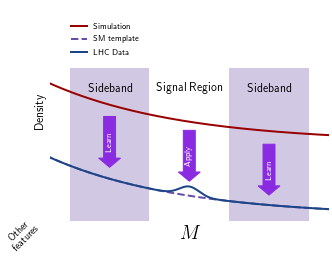

In [60]:

# big schematic



fig = plt.figure(figsize = (5, 4))

y_min = 200
y_max = 600

# sim/
plt.plot(x, signal(x, 3, n_bkg, .5, .025, 0)+y_max, color = sim_color, linewidth = 2, label = "Simulation")

# template
plt.plot(x, signal(x, 3, n_bkg, .5, .025, 0) - y_min, color = trans_color, linewidth = 2, linestyle = "dashed", label = "SM template")

# data
plt.plot(x, signal(x, 3, n_bkg, .5, .025, n_sig) - y_min, color = dat_color, linewidth = 2, label = "LHC Data")




# SB1
plt.fill_between([.2, .4], [-y_min-50, -y_min-50], [y_max+800, y_max+800], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.3, 1150, "Sideband", color = "black", ha = "center", fontsize = f_1)
# SB2
plt.fill_between([.6, .8], [-y_min-50, -y_min-50], [y_max+800, y_max+800], color = trans_color, alpha = alpha, linewidth = 0)
plt.text(.7, 1150, "Sideband", color = "black", ha = "center", fontsize = f_1)

# SR
plt.text(.5, 1150 , "Signal Region", color = "black", ha = "center", fontsize = f_1)

import matplotlib.font_manager


plt.xlabel("$M$", fontsize = f_0)
plt.ylabel("Density", fontsize = f_1)

plt.text(.08,-600,"Other\nfeatures",rotation=45,
         horizontalalignment='center',verticalalignment='bottom', fontsize = 10);

plt.xlim(0.15, 0.85)
plt.ylim(-y_min-50, 2100)
plt.xticks([])
plt.yticks([])
ax = plt.gca()
plt.legend(fontsize = 8, ncol = 1, loc = "upper left", bbox_to_anchor = (.05, 0.95))

plt.arrow(.3, 880, 0, -550, length_includes_head=True,head_width=.055, head_length=100, color = "blueviolet", width = 0.03)
plt.text(.299, 500, "Learn", color = "white", ha = "center", rotation = 90, fontsize = 8, weight = "bold")

plt.arrow(.5, 730, 0, -550, length_includes_head=True,head_width=.055, head_length=100, color = "blueviolet", width = 0.03)
plt.text(.499, 350, "Apply", color = "white", ha = "center", rotation = 90, fontsize = 8, weight = "bold",)

plt.arrow(.7, 580, 0, -550, length_includes_head=True,head_width=.055, head_length=100, color = "blueviolet", width = 0.03)
plt.text(.699, 200, "Learn", color = "white", ha = "center", rotation = 90, fontsize = 8, weight = "bold")



plt.setp(ax.spines.values(), visible=False)
fig.savefig("paper_plots/schematic_feta.png", dpi = dpi)



plt.show()

# LHC plots

In [61]:
n_features = 5
dataset_config_string = f"LHCO_0sig_f/"

exp_dir = os.path.join(feta_dir, dataset_config_string)
data_dir = os.path.join(exp_dir, "data")

# dataset generation parameters
context_endpoints = (2500, 4500)

bands_dict = {"sb1": [2900, 3300],
                  "sr" : [3300, 3700],
                  "sb2": [3700, 4100],
            }

binning_scheme = np.linspace(-3., 3., 50)

n_features = 5

feature_labels = ["$m_{J_1}$ [GeV]", "$\Delta m_{JJ}$ [GeV]", "$\\tau^{21}_{J_1}$", "$\\tau^{21}_{J_2}$", "$\Delta R_{JJ}$", "$m_{JJ}$ [GeV]"]


### Pretty plots for NIPS poster

In [62]:
# get the data

df_sim = get_lhco(sim_type = "herwig")
data_sim = select_lhco_features(df_sim, feature_type = 0).to_numpy()

df_dat = get_lhco(sim_type = "pythia")
data_dat = select_lhco_features(df_dat, feature_type = 0).to_numpy()

df_signal = get_lhco(sim_type = "pythia", sm = "signal")
data_signal = select_lhco_features(df_signal, feature_type = 0).to_numpy()


events_anomalydetection_herwig_features.h5
events_anomalydetection_v2.features.h5
events_anomalydetection_v2.features.h5


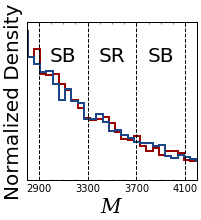

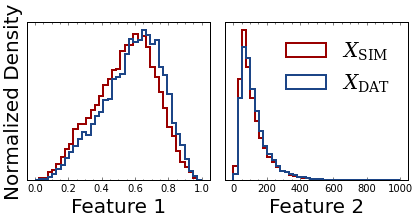

In [103]:
# features plots

alpha = 0.5
n_plot = 10000
bins = 40
w = 2


import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1 #set the value globally


n_features = 6
    

"""fig, ax = plt.subplots(1, n_features, figsize = (4*n_features, 5))

for i in range(n_features):
    ax[i].hist(data_sim[:n_plot,i], bins = bins, density = True, label = "SIM", histtype = "step", color = sim_color, linewidth = w)
    ax[i].hist(data_dat[:n_plot,i], bins = bins, density = True, label = "DAT", histtype = "step", color = dat_color, linewidth = w)
    ax[i].hist(data_signal[:n_plot,i], bins = bins, density = True, label = "Signal", histtype = "step", color = "green", linewidth = w)

    ax[i].set_xlabel(feature_labels[i], fontsize = 30)
    ax[i].set_yticks([])
    
ax[0].set_ylabel("Normalized Density")  
ax[0].legend(fontsize = 20)  
plt.tight_layout()
fig.savefig("paper_plots/features_w_sig.png", dpi = dpi)
fig.show()

    """




plt.figure(figsize = (3, 3))

bins = np.linspace(2500, 4500, 40)

plt.hist(data_sim[:n_plot,5], bins = bins, density = True, label = "$X_R$", histtype = "step", color = sim_color, linewidth = w)
plt.hist(data_dat[:n_plot,5], bins = bins, density = True, label = "$X_T$", histtype = "step", color = dat_color, linewidth = w)
plt.axvline(2900, color = "black", linestyle = "dashed")
plt.axvline(3300, color = "black", linestyle = "dashed")
plt.axvline(3700, color = "black", linestyle = "dashed")
plt.axvline(4100, color = "black", linestyle = "dashed")

#plt.text(3100, .001, "Sideband", horizontalalignment='center', fontsize = 9)
#plt.text(3500, .001, "Signal region", horizontalalignment='center', fontsize = 9)
#plt.text(3900, .001, "Sideband", horizontalalignment='center', fontsize = 9)

plt.text(3100, .0009, "SB", horizontalalignment='center', fontsize = 20)
plt.text(3500, .0009, "SR", horizontalalignment='center', fontsize = 20)
plt.text(3900, .0009, "SB", horizontalalignment='center', fontsize = 20)


plt.xlabel("$M$", fontsize = f_0)
plt.xlim(2800, 4200)
plt.yticks([])
plt.xticks([2900, 3300, 3700, 4100])

plt.ylabel("Normalized Density", fontsize = f_1)  
#plt.legend(fontsize = 20)  
plt.tight_layout()
plt.savefig("paper_plots/M.png", dpi = dpi)
plt.show()


fig, ax = plt.subplots(1, 2, figsize = (6, 3))

bins = np.linspace(0, 1, 40)
ax[0].hist(data_sim[:n_plot,2], bins = bins, density = True, label = "$X_\mathrm{SIM}$", histtype = "step", color = sim_color, linewidth = w)
ax[0].hist(data_dat[:n_plot,2], bins = bins, density = True, label = "$X_\mathrm{DAT}$", histtype = "step", color = dat_color, linewidth = w)
ax[0].set_xlabel("Feature 1", fontsize = f_0)
ax[0].set_yticks([])

bins = np.linspace(0, 1000, 40)
ax[1].hist(data_sim[:n_plot,0], bins = bins, density = True, label = "$X_\mathrm{SIM}$", histtype = "step", color = sim_color, linewidth = w)
ax[1].hist(data_dat[:n_plot,0], bins = bins, density = True, label = "$X_\mathrm{DAT}$", histtype = "step", color = dat_color, linewidth = w)
ax[1].set_xlabel("Feature 2", fontsize = f_0)
ax[1].set_yticks([])

ax[0].set_ylabel("Normalized Density", fontsize = f_1)  
ax[1].legend(fontsize = f_0)  
plt.tight_layout()
fig.savefig("paper_plots/features_nips.png", dpi = dpi)
fig.show()

   



## Results (0 sig)

In [64]:
seed = 1

num_layers_BD_sim = 1
num_blocks = 15
num_hidden_features_BD_sim = 128


loc_id_BD_sim = f"BD_sim_Masked_PRQ_AR_{num_layers_BD_sim}layers_{num_hidden_features_BD_sim}hidden_{num_blocks}blocks_{seed}seed"
BD_sim_training_dir = os.path.join(exp_dir, f"saved_models_{loc_id_BD_sim}/")

num_layers_s2d = 2
num_nodes_s2d = 16

loc_id_s2d = f"PRQ_Coupling_{num_layers_s2d}layers_{num_nodes_s2d}nodes_{seed}seed"
s2d_training_dir = os.path.join(BD_sim_training_dir, f"saved_models_{loc_id_s2d}/")
s2d_samples_dir = os.path.join(s2d_training_dir, f"npy_samples/")


    
sim_samples = {}
transformed_sim_samples = {}
dat_samples = {}

for band in list(bands_dict.keys()):
    # sim
    sim_samples[band] = np.load(os.path.join(s2d_samples_dir, f"{band}_SIM.npy"))
    # trans sim
    transformed_sim_samples[band] = np.load(os.path.join(s2d_samples_dir, f"{band}_transSIM.npy"))
    # dat
    dat_samples[band] = np.load(os.path.join(s2d_samples_dir, f"{band}_DAT.npy"))
    
    
bands_to_plot = list(bands_dict.keys())



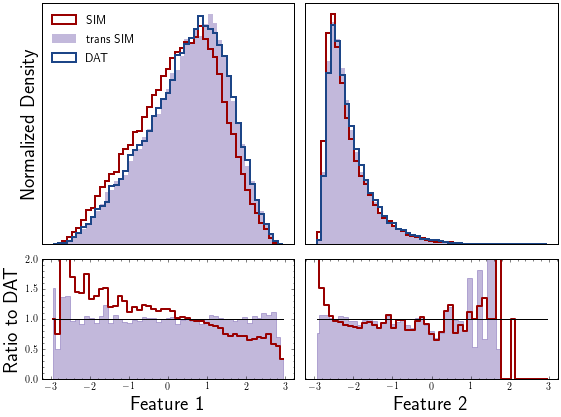

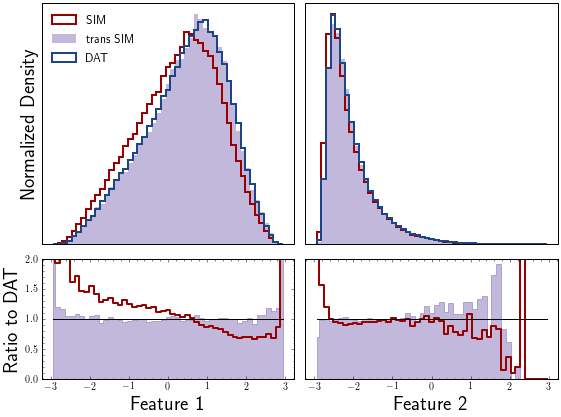

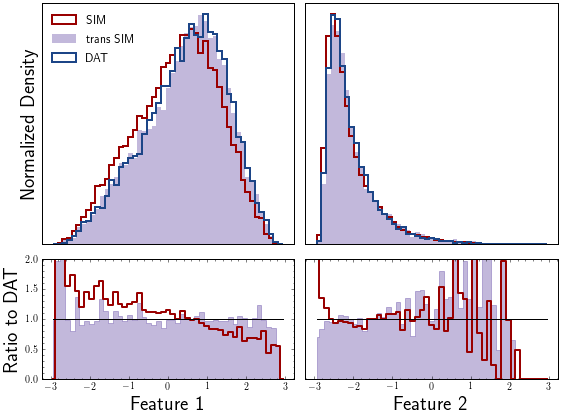

In [75]:

n_plot = -1

alpha = 0.4
n_features = 5

n_to_plot= [2,0]

for band in bands_to_plot:
    

    fig, ax = plt.subplots(2, 2, figsize = (4*(2), 6), gridspec_kw={'height_ratios': [2, 1]})
    for i, n in enumerate(n_to_plot):

        # Plots hists
        ax[0, i].hist(sim_samples[band][:n_plot,n], bins = binning_scheme, label = "SIM", histtype = "step", color = sim_color, density = True, linewidth = w)
        ax[0, i].hist(transformed_sim_samples[band][:n_plot,n], bins = binning_scheme, label = "trans SIM", histtype = "bar", alpha = alpha, color = trans_color, density = True)
        ax[0, i].hist(dat_samples[band][:n_plot,n], bins = binning_scheme, label = "DAT", histtype = "step", color = dat_color, density = True, linewidth = w)
        
        ax[0, i].set_xticks([])
        ax[0, i].set_yticks([])

        # Plot ratios
        sim_hist, _ = np.histogram(sim_samples[band][:n_plot,n], bins = binning_scheme, density = True)
        trans_sim_hist, _ = np.histogram(transformed_sim_samples[band][:n_plot,n], bins = binning_scheme, density = True)
        dat_hist, _ = np.histogram(dat_samples[band][:n_plot,n], bins = binning_scheme, density = True)

        sim_ratio = np.divide(sim_hist, dat_hist, out=np.zeros_like(sim_hist), where=dat_hist!=0)
        trans_sim_ratio = np.divide(trans_sim_hist, dat_hist, out=np.zeros_like(trans_sim_hist), where=dat_hist!=0)

        bin_centers = 0.5*(binning_scheme[1:] + binning_scheme[:-1])
        width = bin_centers[1] - bin_centers[0]

        ax[1, i].step(bin_centers, sim_ratio, color = sim_color, where = "mid", label = "SIM/DAT", linewidth = w)
        ax[1, i].fill_between(bin_centers, trans_sim_ratio, step="mid", alpha = alpha, label = "(trans SIM)/DAT", color = trans_color)
        ax[1, i].plot(bin_centers, np.full(bin_centers.shape, 1), color = "black")
        ax[1, i].set_xlabel(f"Feature {i+1}", fontsize = f_0)
        ax[1, i].set_ylim([0,2])
        if i != 0:
            ax[1, i].set_yticks([])
        
    ax[0, 0].set_ylabel("Normalized Density", fontsize = f_0)  
    ax[1, 0].set_ylabel("Ratio to DAT", fontsize = f_0)
    
    
    
    ax[0, 0].legend(fontsize = f_1)

    plt.tight_layout()
    fig.savefig(f"paper_plots/results_{band}.png", dpi = dpi)
    fig.show()
    



In [76]:
results_dir = "/clusterfs/ml4hep/rrmastandrea/NF_results/"

n_sig_inj = [0, 300, 500, 750, 1000, 1200, 1500, 2000, 2500, 3000]

seeds = [x for x in range(20)]

In [80]:
def get_sic_rejection(idd, seed, n):
    
    loc_dir = f"{results_dir}/nsig_inj{n}_seed1/"
    
    path_to_fpr = f"{loc_dir}/fpr_{idd}_{seed}.npy"
    path_to_tpr = f"{loc_dir}/tpr_{idd}_{seed}.npy"
    fpr = np.load(path_to_fpr)
    tpr = np.load(path_to_tpr)
    rejection = 1.0/fpr
    sic = tpr/np.sqrt(fpr)
    
    
    return tpr, sic, rejection


x_axis = np.logspace(-8, 0, 400)


keys = ["full_sup", "feta"]#, "combined"]#, "combined_1200k"]


rejections_dict = {k:{n:[] for n in n_sig_inj} for k in keys}
                 

sics_dict = {k:{n:[] for n in n_sig_inj} for k in keys}

max_sics_dict = {k:{n:[] for n in n_sig_inj} for k in keys}


for n in n_sig_inj:
    
    for seed in seeds:
        
        for k in keys:
            
            if k == "full_sup":
                tpr, sic, rejection = get_sic_rejection(k, seed, 0)
            else: 
                tpr, sic, rejection = get_sic_rejection(k, seed, n)
                
            
            interp_sic = np.interp(x_axis, tpr, sic)
            interp_rej = np.interp(x_axis, tpr, rejection)
            rejections_dict[k][n].append(interp_rej)
            sics_dict[k][n].append(interp_sic)
            max_sics_dict[k][n].append(np.nanmax(sic[np.isfinite(sic)]))
            

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [81]:
def get_mean_std(loc_list):
    
    mean = np.nanmedian(loc_list, axis = 0)
    std = np.nanstd(loc_list, axis = 0)
    
    return mean, std

mean_rejections_dict = {k:{n:[] for n in n_sig_inj} for k in keys}
mean_sics_dict = {k:{n:[] for n in n_sig_inj} for k in keys}
mean_max_sics_dict = {k:[[],[]] for k in keys} # mean, stf
    
   

for n in n_sig_inj:
    
    for k in keys:
        
        mean_rejections_dict[k][n] = get_mean_std(rejections_dict[k][n])
        mean_sics_dict[k][n] = get_mean_std(sics_dict[k][n])
        mean_max_sics_dict[k][0].append(np.median(max_sics_dict[k][n]))
        mean_max_sics_dict[k][1].append(np.std(max_sics_dict[k][n]))
        



for k in keys:
    mean_max_sics_dict[k][0] = np.array(mean_max_sics_dict[k][0])
    mean_max_sics_dict[k][1] = np.array(mean_max_sics_dict[k][1])
    


In [99]:
n_to_plot = [2500]

colors_dict = {"full_sup":"green",
              "combined": "blue",
               "combined_1200k": "brown",
               "feta": trans_color,
               "cathode":"pink",
               "curtains":"orange"}

labels_dict = {"full_sup":"Fully Supervised",
              "combined": "Combined",
               "combined_1200k": "combined new",
               "feta": "FETA",
               "cathode":"CATHODE",
               "curtains":"CURTAINs"}


l = 3
f_1 = 20
f_2 = 30

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


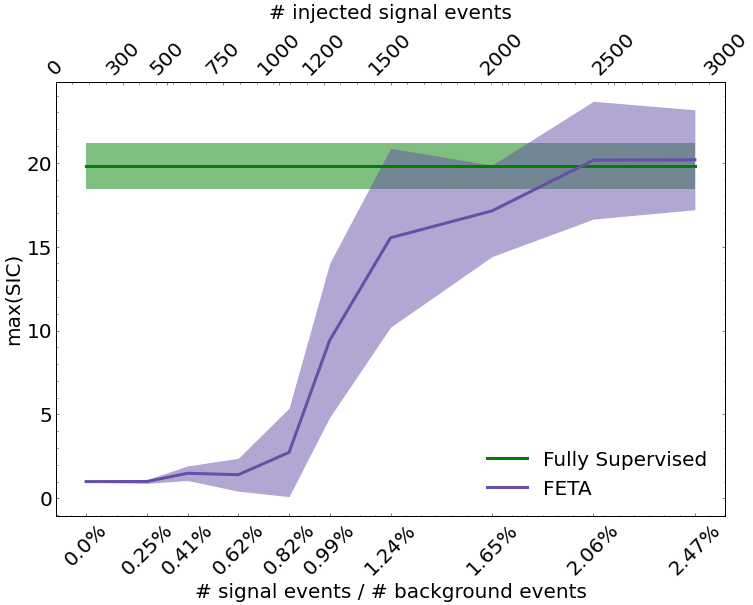

In [101]:
num_bkg = 121339

x_vals = [n / num_bkg for n in n_sig_inj]

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
plt.rc( 'text', usetex=False ) 


fig = plt.figure(figsize = (12, 8))
for k in keys:

    plt.plot(x_vals, mean_max_sics_dict[k][0], label = labels_dict[k], color = colors_dict[k], linewidth = l)

    plt.fill_between(x_vals, mean_max_sics_dict[k][0] -mean_max_sics_dict[k][1],
                        mean_max_sics_dict[k][0] + mean_max_sics_dict[k][1],
                         alpha = 0.5, color = colors_dict[k], linewidth = 0)
   

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax2.set_xticks(n_sig_inj)
ax2.set_xticklabels(n_sig_inj, size=f_0, rotation = 45)
ax2.set_xlabel("# injected signal events", fontsize = f_0, labelpad = 10)


ax1.set_xticks(x_vals)
ax1.set_xticklabels([f"{np.round(100*x, 2)}%" for x in x_vals], size=f_0, rotation = 45)
ax1.set_xlabel("# signal events / # background events", fontsize = f_1)

ax1.legend(fontsize = f_1, loc = "lower right")

ax1.set_ylabel("max(SIC)", fontsize = f_1)

ax1.tick_params(axis='both', which='major', labelsize=f_0)
fig.savefig(f"paper_plots/maxsic_poster.png", dpi = dpi)

plt.show()



